# Homework 4 (Dev Mody)
## Exercise 4 (Principle Component Analysis)

In this exercise, we shall try to reproduce the results shown in Figure 8.7 from Example 8.4 in the textbook. We shall use the dataset `2d_span_data.csv` along with the code on Page 218-219 as follows:
```python
# center an input dataset X
def center(X):
    X_means = np.mean(X,axis=1)[:,np.newaxis]
    X_centered = X - X_means
    return X_centered

# function for computing principal components of input dataset X
def compute_pcs(X,lam):
    # create the data covariance matrix
    P = float(X.shape[1])
    Cov = 1/P*np.dot(X,X.T) + lam*np.eye(X.shape[0])
    # use numpy function to compute eigenvectors / eigenvalues D,V = np.linalg.eigh(Cov)
    return D,V

X_original = np.loadtxt(datapath + '2d_span_data.csv',delimiter=',')
```

### Exercise 4.1
Import the dataset and use `def center(X)` to first center the data and then `def compute_pcs(X,lam)` to compute the principal components. Finally reproduce Fig 8.7

ANSWER: The Implementation for the above functions is as follows:


In [15]:
# install github clone - allows for easy cloning of subdirectories
!pip install github-clone
from pathlib import Path 

# clone datasets
if not Path('chapter_8_datasets').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/8_Linear_unsupervised_learning/chapter_8_datasets
else:
    print('chapter_8_datasets already cloned!')

# clone library subdirectory
if not Path('chapter_8_library').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/8_Linear_unsupervised_learning/chapter_8_library
else:
    print('chapter_8_library already cloned!')

# clone images
if not Path('chapter_8_images').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/8_Linear_unsupervised_learning/chapter_8_images
else:
    print('chapter_8_images already cloned!')

# clone videos
if not Path('chapter_8_videos').is_dir():
    !ghclone https://github.com/neonwatty/machine-learning-refined-notes-assets/tree/main/notes/8_Linear_unsupervised_learning/chapter_8_videos
else:
    print('chapter_8_videos already cloned!')

## run universally whether in collab or local ##
# append path for local library, data, and image import
import sys
sys.path.append('./chapter_8_library') 
sys.path.append('./chapter_8_images') 
sys.path.append('./chapter_8_datasets') 

# import section helper
import section_8_3_helpers

# dataset paths
dataset_path_1 = 'chapter_8_datasets/2d_span_data.csv'
dataset_path_2 = 'chapter_8_datasets/3d_span_data.csv'

# image paths
image_path_1 = "chapter_8_images/pca_classic.png"
image_path_2 = "chapter_8_images/Fig_9_7.png"

# standard imports
import matplotlib.pyplot as plt
from IPython.display import Image
import autograd.numpy as np
from matplotlib import gridspec

# this is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

chapter_8_datasets already cloned!
chapter_8_library already cloned!
chapter_8_images already cloned!
chapter_8_videos already cloned!


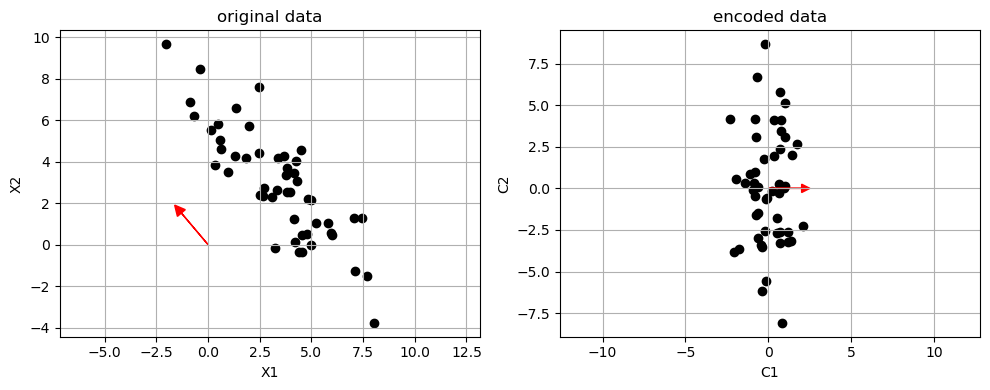

Eigenvalues: [11.57205837  1.09633819]


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import section_8_3_helpers as helpers

# Define the path to the dataset (adjust as needed)
dataset_path_2 = '2d_span_data.csv'

# Center an input dataset X
def center(X):
    X_means = np.mean(X, axis=1)[:, np.newaxis]
    X_centered = X - X_means
    return X_centered

# Function for computing principal components of input dataset X
def compute_pcs(X, lam=0.1):
    P = float(X.shape[1])
    Cov = 1/P * np.dot(X, X.T) + lam * np.eye(X.shape[0])
    D, V = np.linalg.eigh(Cov)
    # Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(D)[::-1]
    D = D[idx]
    V = V[:, idx]
    return D, V

# Load and prepare data
X_original = np.loadtxt(dataset_path_2, delimiter=',')  # Transpose to get features as rows
X = center(X_original)

# Compute principal components
D, V = compute_pcs(X)
C = V[:, :2]  # Take the top 2 principal components

# Project data onto principal components
X_projected = np.dot(C.T, X)

# Visualization
plt.figure(figsize=(10, 4))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(X_original[0, :], X_original[1, :], c='black')
# Add arrow along the first principal component
pc1 = C[:, 0]  # First principal component
arrow_scale = 2  # Scale for visibility
plt.arrow(0, 0, arrow_scale * pc1[0], arrow_scale * pc1[1], head_width=0.5, head_length=0.5, fc='r', ec='r')
plt.title('original data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.axis('equal')  # Ensure aspect ratio is equal

# Plot encoded data
plt.subplot(1, 2, 2)
plt.scatter(X_projected[1, :], X_projected[0, :], c='black')  # Swap axes to match Figure 8.7
# Add arrow along C1 axis (horizontal)
plt.arrow(0, 0, arrow_scale, 0, head_width=0.5, head_length=0.5, fc='r', ec='r')
plt.title('encoded data')
plt.xlabel('C1')
plt.ylabel('C2')
plt.grid(True)
plt.axis('equal')  # Ensure aspect ratio is equal

plt.tight_layout()
plt.show()

# Optional: Print eigenvalues
print(f"Eigenvalues: {D}")